In [ ]:
#Import Package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_error , mean_squared_error , mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.neighbors import NearestNeighbors

In [ ]:
#Import Data
df=pd.read_csv('DATAGABFIX.csv', sep=',')
print('gabungan :\n')
df.info()
print('=======================================\n')
print('Missing Values pada Data :')
print(df.isnull().sum())

gabungan :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  601 non-null    object 
 1   HCI      601 non-null    float64
 2   EDU      420 non-null    float64
 3   HEALTH   580 non-null    float64
 4   SANI     397 non-null    float64
 5   DEBT     369 non-null    float64
 6   GDP      597 non-null    float64
 7   PNEMO    530 non-null    float64
 8   DIARE    530 non-null    float64
dtypes: float64(8), object(1)
memory usage: 42.4+ KB

Missing Values pada Data :
Country      0
HCI          0
EDU        181
HEALTH      21
SANI       204
DEBT       232
GDP          4
PNEMO       71
DIARE       71
dtype: int64


In [ ]:
#Handling Missing Value
print('=======================================\n')
print('Handling Missing Values variabel HCI pada Data :')
df['HCI'] = df['HCI'].fillna(df['HCI'].median())
print('Handling Missing Values variabel EDU pada Data :')
df['EDU'] = df['EDU'].fillna(df['EDU'].median())
print('Jumlah Missing Values pada setelah handling pada Data :')
df['HEALTH'] = df['HEALTH'].fillna(df['HEALTH'].median())
print('Jumlah Missing Values pada setelah handling pada Data :')
df['SANI'] = df['SANI'].fillna(df['SANI'].median())
print('Jumlah Missing Values pada setelah handling pada Data :')
df['DEBT'] = df['DEBT'].fillna(df['DEBT'].median())
print('Jumlah Missing Values pada setelah handling pada Data :')
df['GDP'] = df['GDP'].fillna(df['GDP'].median())
print('Jumlah Missing Values pada setelah handling pada Data :')
df['PNEMO'] = df['PNEMO'].fillna(df['PNEMO'].median())
print('Jumlah Missing Values pada setelah handling pada Data :')
df['DIARE'] = df['DIARE'].fillna(df['DIARE'].median())
print('Jumlah Missing Values pada setelah handling pada Data :')
print(df.isnull().sum())


Handling Missing Values variabel HCI pada Data :
Handling Missing Values variabel EDU pada Data :
Jumlah Missing Values pada setelah handling pada Data :
Jumlah Missing Values pada setelah handling pada Data :
Jumlah Missing Values pada setelah handling pada Data :
Jumlah Missing Values pada setelah handling pada Data :
Jumlah Missing Values pada setelah handling pada Data :
Jumlah Missing Values pada setelah handling pada Data :
Jumlah Missing Values pada setelah handling pada Data :
Country    0
HCI        0
EDU        0
HEALTH     0
SANI       0
DEBT       0
GDP        0
PNEMO      0
DIARE      0
dtype: int64


In [ ]:
df

,Country,HCI,EDU,HEALTH,SANI,DEBT,GDP,PNEMO,DIARE
0,Albania,0.543603,4.366525,4.602225,43.843865,4.605164e+09,4114.13490,94.0,1.356010
1,United Arab Emirates,0.621274,4.366525,4.049994,79.691708,1.284940e+10,32024.19780,12.0,1.045706
2,Argentina,0.588557,5.531050,9.455988,49.756298,1.336950e+11,8225.13758,757.0,5.173022
3,Australia,0.754844,5.085820,8.563165,63.623457,1.284940e+10,42783.32260,37.0,0.395518
4,Austria,0.737782,5.730250,10.225825,99.648970,1.284940e+10,48153.32400,6.0,0.394432
...,...,...,...,...,...,...,...,...,...
596,Kosovo,0.567332,4.366525,6.470227,64.581756,2.428182e+09,4416.10836,147.5,5.173022
597,"Yemen, Rep.",0.372784,4.366525,6.470227,18.568462,7.055218e+09,6119.76234,147.5,5.173022
598,South Africa,0.425453,6.505050,9.109355,64.581756,1.853570e+11,6624.76186,3952.0,71.937276
599,Zambia,0.396928,4.465180,5.312203,64.581756,2.772625e+10,1305.00103,3559.0,133.140310


In [ ]:
#export to excel
df.to_excel('Data FIx Imputasi.xlsx', sheet_name='Data baru',index=False)

In [ ]:
col = df.columns.to_list()
col

['Country', 'HCI', 'EDU', 'HEALTH', 'SANI', 'DEBT', 'GDP', 'PNEMO', 'DIARE']

In [ ]:
country=[df['Country'].to_list()]
hci=[df['HCI'].to_list()]
edu=[df['EDU'].to_list()]
health=[df['HEALTH'].to_list()]
sani=[df['SANI'].to_list()]
debt=[df['DEBT'].to_list()]
gdp=[df['GDP'].to_list()]
pnemo=[df['PNEMO'].to_list()]
diare=[df['DIARE'].to_list()]

In [ ]:
hci

[[0.54360294,
  0.62127405,
  0.58855706,
  0.75484377,
  0.73778212,
  0.49745739,
  0.34287551,
  0.75272685,
  0.36558479,
  0.31972128,
  0.63661927,
  0.60491228,
  0.53295249,
  0.36771211,
  0.77410376,
  0.76814371,
  0.62636,
  0.3038381,
  0.37978294,
  0.40927175,
  0.58024949,
  0.59775889,
  0.68636197,
  0.72696912,
  0.76074028,
  0.74873841,
  0.5312829,
  0.52580673,
  0.47885305,
  0.70828557,
  0.72566378,
  0.81736147,
  0.75689185,
  0.7654537,
  0.54114884,
  0.37168971,
  0.71486032,
  0.44194081,
  0.78090757,
  0.69329935,
  0.68972987,
  0.49636143,
  0.76630253,
  0.56432194,
  0.75517762,
  0.71826905,
  0.75026584,
  0.55652708,
  0.8161875,
  0.59402978,
  0.8246274,
  0.57171452,
  0.34088042,
  0.68839002,
  0.70020348,
  0.67645812,
  0.64832515,
  0.47443458,
  0.55578142,
  0.38865483,
  0.58911878,
  0.53777397,
  0.68021804,
  0.58517152,
  0.60013884,
  0.36382145,
  0.58434504,
  0.39370978,
  0.79709911,
  0.77056706,
  0.77869129,
  0.54755247,


In [ ]:
#Creating dictionary
dic={
    col[0]:country,
    col[1]:hci,
    col[2]:edu,
    col[3]:health,
    col[4]:sani,
    col[5]:debt,
    col[6]:gdp,
    col[7]:pnemo,
    col[8]:diare
}

In [ ]:
df1=pd.DataFrame(dic)
df1

,Country,HCI,EDU,HEALTH,SANI,DEBT,GDP,PNEMO,DIARE
0,"[Albania, United Arab Emirates, Argentina, Aus...","[0.54360294, 0.62127405, 0.58855706, 0.7548437...","[4.3665249345, 4.3665249345, 5.531050205, 5.08...","[4.6022253, 4.04999352, 9.45598793, 8.56316471...","[43.8438649, 79.6917076, 49.756298, 63.6234566...","[4605163642.0, 12849396625.0, 133695000000.0, ...","[4114.1349, 32024.1978, 8225.13758, 42783.3226...","[94.0, 12.0, 757.0, 37.0, 6.0, 2449.0, 3474.0,...","[1.356009824, 1.045706488, 5.173022196, 0.3955..."


In [ ]:
#export to excel
df1.to_excel('Data gabungan tableau terbaru.xlsx', sheet_name='Data baru',index=False)

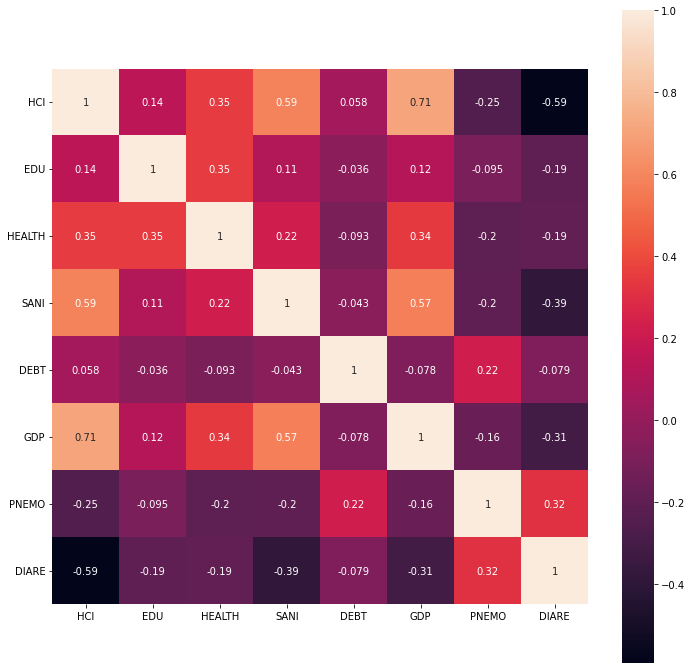

In [ ]:
# Heatmap
fig = plt.figure(figsize=(12,12))
corr = df.corr()
sns.heatmap(corr, annot=True, square=True,)
plt.yticks(rotation=0)

plt.show()

In [ ]:
#Descriptive Statistics
print('Descriptive Statistics pada Data :')
print(df.describe())
print('=======================================\n')

Descriptive Statistics pada Data :
              HCI         EDU      HEALTH        SANI          DEBT  \
count  601.000000  601.000000  601.000000  601.000000  6.010000e+02   
mean     0.569461    4.488071    6.679110   61.626751  4.580971e+10   
std      0.145609    1.489106    2.796722   23.737210  1.497183e+11   
min      0.286075    1.326320    2.083311    5.866489  8.090757e+07   
25%      0.443490    3.729640    4.512254   49.756298  7.890234e+09   
50%      0.574536    4.366525    6.470227   64.581756  1.284940e+10   
75%      0.690000    4.951570    8.458914   77.152274  1.857658e+10   
max      0.887084   12.903480   23.961813  100.000000  2.114160e+12   

                 GDP          PNEMO        DIARE  
count     601.000000     601.000000   601.000000  
mean    15154.805095    3728.326955    61.500267  
std     20096.511200   15124.142457   131.840417  
min       212.137057       0.000000     0.135771  
25%      2169.991500      19.000000     1.005310  
50%      6119.76234

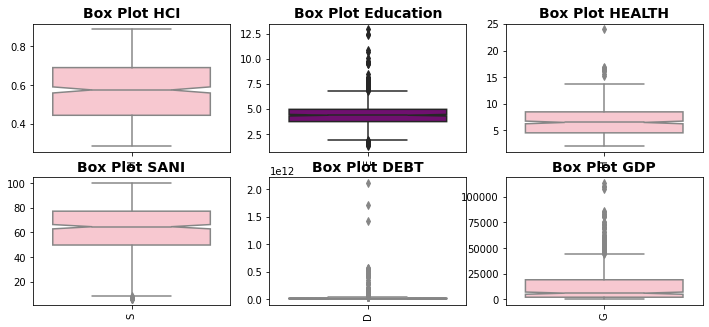

In [ ]:
#Check Outlier
fig = plt.figure(figsize=(12,8))

ax0 = plt.subplot2grid((3,3), (1,0))
ax1 = plt.subplot2grid((3,3), (1,1))
ax2 = plt.subplot2grid((3,3), (1,2))
ax3 = plt.subplot2grid((3,3), (2,0))
ax4 = plt.subplot2grid((3,3), (2,1))
ax5 = plt.subplot2grid((3,3), (2,2))


sns.set_style('whitegrid')

# Box Plot
grafik_1 = sns.boxplot(ax=ax0, data=df['HCI'], color='pink', notch=True)
grafik_1.set_xticklabels(labels='HCI', rotation=90)
grafik_1.set_title('Box Plot HCI', fontdict={'fontweight':'bold', 'fontsize':14})

grafik_1 = sns.boxplot(ax=ax1, data=df['EDU'], color='purple', notch=True)
grafik_1.set_xticklabels(labels='EDU', rotation=90)
grafik_1.set_title('Box Plot Education', fontdict={'fontweight':'bold', 'fontsize':14})

grafik_1 = sns.boxplot(ax=ax2, data=df['HEALTH'], color='pink', notch=True)
grafik_1.set_xticklabels(labels='HEALTH', rotation=90)
grafik_1.set_title('Box Plot HEALTH', fontdict={'fontweight':'bold', 'fontsize':14})

grafik_1 = sns.boxplot(ax=ax3, data=df['SANI'], color='pink', notch=True)
grafik_1.set_xticklabels(labels='SANI', rotation=90)
grafik_1.set_title('Box Plot SANI', fontdict={'fontweight':'bold', 'fontsize':14})

grafik_1 = sns.boxplot(ax=ax4, data=df['DEBT'], color='pink', notch=True)
grafik_1.set_xticklabels(labels='DEBT', rotation=90)
grafik_1.set_title('Box Plot DEBT', fontdict={'fontweight':'bold', 'fontsize':14})

grafik_1 = sns.boxplot(ax=ax5, data=df['GDP'], color='pink', notch=True)
grafik_1.set_xticklabels(labels='GDP', rotation=90)
grafik_1.set_title('Box Plot GDP', fontdict={'fontweight':'bold', 'fontsize':14})

plt.show()

In [ ]:
df.min()

Country    Afghanistan
HCI           0.286075
EDU            1.32632
HEALTH        2.083311
SANI          5.866489
DEBT        80907571.1
GDP         212.137057
PNEMO              0.0
DIARE         0.135771
dtype: object

## **EDA**

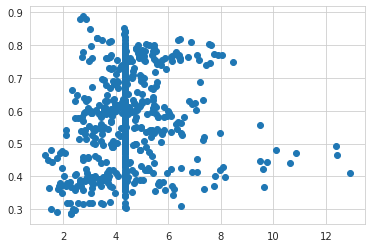

In [ ]:
plt.scatter(df['EDU'], df['HCI'])
plt.show()

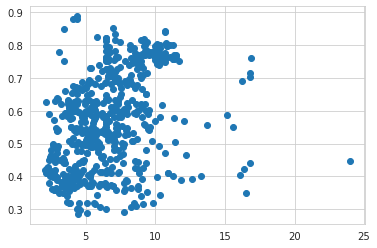

In [ ]:
plt.scatter(df['HEALTH'], df['HCI'])
plt.show()

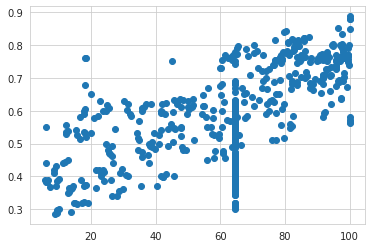

In [ ]:
plt.scatter(df['SANI'], df['HCI'])
plt.show()

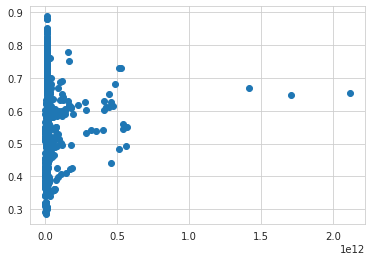

In [ ]:
plt.scatter(df['DEBT'], df['HCI'])
plt.show()

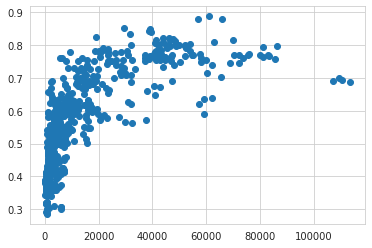

In [ ]:
plt.scatter(df['GDP'], df['HCI'])
plt.show()

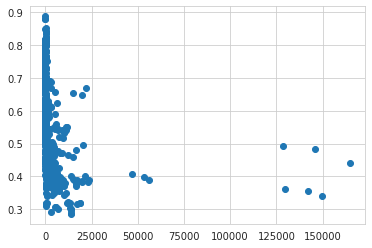

In [ ]:
plt.scatter(df['PNEMO'], df['HCI'])
plt.show()

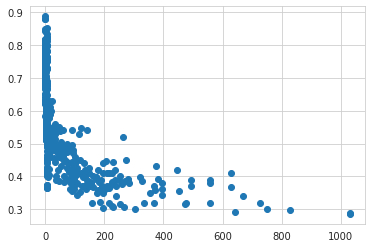

In [ ]:
plt.scatter(df['DIARE'], df['HCI'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


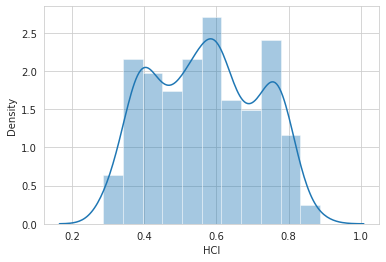

In [ ]:
sns.distplot(df['HCI'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


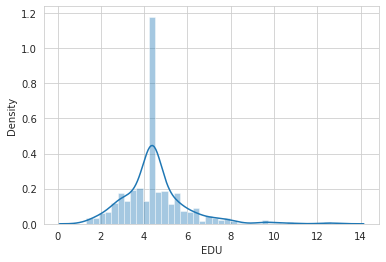

In [ ]:
sns.distplot(df['EDU'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


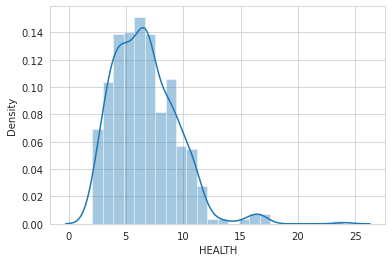

In [ ]:
sns.distplot(df['HEALTH'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


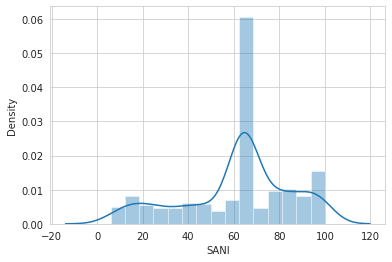

In [ ]:
sns.distplot(df['SANI'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


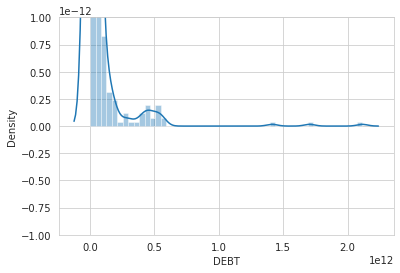

In [ ]:
sns.distplot(df['DEBT'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


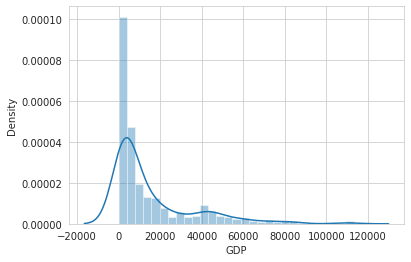

In [ ]:
sns.distplot(df['GDP'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


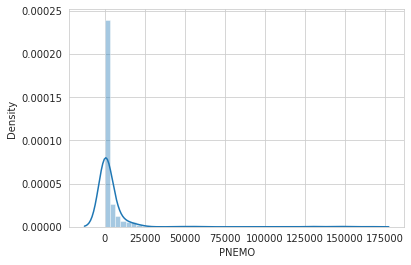

In [ ]:
sns.distplot(df['PNEMO'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


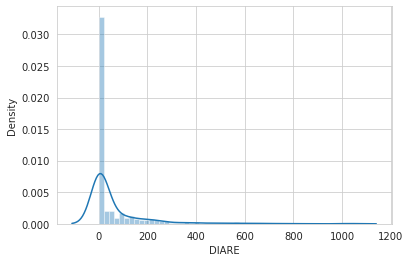

In [ ]:
sns.distplot(df['DIARE'])

In [ ]:
#Pembagian Data

#Target
y=df['HCI']

#Feature
features=['EDU', 'HEALTH', 'SANI', 'DEBT', 'GDP','PNEMO','DIARE']
X=df[features]

In [ ]:
#Function Random Forest
def forest(a,b):
  #Split Data
  train_X, val_X, train_y, val_y = train_test_split(a, b, random_state=1)

  #Model Random Forest

  #create the model
  rf=RandomForestRegressor(random_state=1)

  #fit the model
  rf.fit(train_X,train_y)

  #Model Evaluation
  rf_val_mae = mean_absolute_error(rf.predict(val_X),val_y)
  print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))


In [ ]:
#Pengujian
forest(X,y)

Validation MAE for Random Forest Model: 0.027884162957615873


In [ ]:
#Function Random Forest
def forest_new(df):
  #Split Data
  train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=43)

  #Model Random Forest

  #create the model
  rf=RandomForestRegressor()

  #fit the model
  rf_fit = rf.fit(train_X,train_y)

  #prediction value
  rf_predict = rf.predict(test_X)

  #score random forest
  rf_score = rf.score(train_X, train_y), rf.score(test_X, test_y)
  return rf_predict, rf_score, test_y

In [ ]:
rf_predict, rf_score, test_y = forest_new(df)

In [ ]:
test_y

90     0.367950
144    0.810000
145    0.770000
339    0.564260
539    0.315685
         ...   
463    0.752257
371    0.768535
2      0.588557
223    0.370000
147    0.780000
Name: HCI, Length: 151, dtype: float64

In [ ]:
print("Random Forest Score: {}".format(rf_score))

Random Forest Score: (0.9875099208701972, 0.9355389160928835)


In [ ]:
compare_rf = pd.DataFrame({"Actual Data": test_y, "Predicted Data": rf_predict})
print("-------------------------------------")
print("---------Random Forest Regression----------")
print(compare_rf.head(10))

-------------------------------------
---------Random Forest Regression----------
     Actual Data  Predicted Data
90      0.367950        0.387325
144     0.810000        0.790718
145     0.770000        0.755567
339     0.564260        0.615398
539     0.315685        0.357221
231     0.760000        0.662609
143     0.390000        0.388454
166     0.760000        0.748928
183     0.710000        0.717490
513     0.515126        0.580381


In [ ]:
def actual_pred_plot(df, title):
    plt.figure(figsize =(14,6))
    df = df.reset_index()
    df = df.drop(["index"], axis=1)
    plt.plot(df[:50])
    plt.legend(["Actual", "Predicted"])
    plt.title(title)
    plt.show()

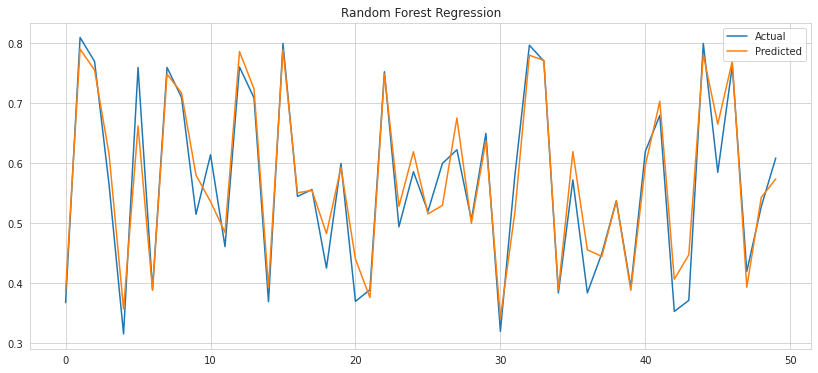

In [ ]:
actual_pred_plot(compare_rf, "Random Forest Regression")

In [ ]:
def models_evaluation(df, model_name):
    print("-------------------------------")
    print(model_name)
    print("R-Squared:", r2_score(df["Actual Data"], df["Predicted Data"]))
    print("MAE:", mean_absolute_error(df["Actual Data"], df["Predicted Data"]))
    print("MSE:", mean_squared_error(df["Actual Data"], df["Predicted Data"]))
    print("MAE%:", mean_absolute_percentage_error(df["Actual Data"], df["Predicted Data"]))
    print("-------------------------------")

In [ ]:
models_evaluation(compare_rf, "Random Forest Regression")

-------------------------------
Random Forest Regression
R-Squared: 0.9355389160928835
MAE: 0.029841594909933787
MSE: 0.001574256342748303
MAE%: 0.05708677309933335
-------------------------------
